# Calculus Intuition for Micrograd

**You don't need to be a calculus expert.** You need ONE idea:

> If I nudge the input a tiny bit, how much does the output change?

That's literally it. The rest is just applying this idea in clever ways.

---

In [ ]:
%load_ext claude_code_jupyter
import matplotlib.pyplot as plt

---
## Section 1: Why Do We Even Need This?

### Real World Example: Your Car's Speedometer

Imagine you're driving and look at your odometer:
- At 2:00 PM: odometer reads **100 miles**
- At 3:00 PM: odometer reads **160 miles**

**Question:** How fast were you going?

Easy: `(160 - 100) / (1 hour) = 60 mph`

That's the **average** speed over an hour. But what about your **exact** speed at 2:30 PM?

To get that, you'd need to look at a *much smaller* time window:
- At 2:30:00 PM: odometer reads 130.0000 miles
- At 2:30:01 PM: odometer reads 130.0167 miles (one second later)

Speed at that instant: `0.0167 miles / (1/3600 hours) = 60.12 mph`

**This is calculus:** finding the *instantaneous* rate of change by looking at tinier and tinier windows.

### Why Neural Networks Care

In a neural network, we have:
- **Inputs**: your data (like an image)
- **Weights**: knobs the network can turn
- **Output**: a prediction (like "this is a cat")
- **Loss**: how wrong the prediction is

**The big question:** If I turn this weight knob a tiny bit, does the loss go up or down?

- If turning it **up** makes the loss go **down** → turn it up!
- If turning it **up** makes the loss go **up** → turn it down!

Calculus tells us exactly how each knob affects the output. That's it.

---
## Section 2: The "Nudge" Intuition

Let's start with the simplest possible example.

### A Boring Function: f(x) = x

If `f(x) = x`, then whatever you put in comes right back out.

- f(5) = 5
- f(100) = 100

**Question:** If I nudge the input from 5 to 5.001, what happens to the output?

Answer: It goes from 5 to 5.001. The output nudged by exactly the same amount!

We say: **the derivative is 1** (output nudge = 1 × input nudge)

In [5]:
# Let's verify with code
def f(x):
    return x  # boring function

x = 5
nudge = 0.001

before = f(x)
after = f(x + nudge)

print(f"Before nudge: f({x}) = {before}")
print(f"After nudge:  f({x + nudge}) = {after}")
print(f"Output changed by: {after - before}")
print(f"Input changed by:  {nudge}")
print(f"")
print(f"Ratio (derivative): {(after - before) / nudge}")

Before nudge: f(5) = 5
After nudge:  f(5.001) = 5.001
Output changed by: 0.001000000000000334
Input changed by:  0.001

Ratio (derivative): 1.000000000000334


### A Slightly More Interesting Function: f(x) = 2x

This function doubles whatever you give it.

**Question:** If I nudge x from 5 to 5.001, what happens to the output?

- Before: f(5) = 10
- After: f(5.001) = 10.002

The output nudged by **twice** as much as the input!

We say: **the derivative is 2** (output nudge = 2 × input nudge)

In [6]:
def f(x):
    return 2 * x  # doubles the input

x = 5
nudge = 0.001

before = f(x)
after = f(x + nudge)

print(f"Before nudge: f({x}) = {before}")
print(f"After nudge:  f({x + nudge}) = {after}")
print(f"Output changed by: {after - before}")
print(f"Input changed by:  {nudge}")
print(f"")
print(f"Ratio (derivative): {(after - before) / nudge}")

Before nudge: f(5) = 10
After nudge:  f(5.001) = 10.002
Output changed by: 0.002000000000000668
Input changed by:  0.001

Ratio (derivative): 2.000000000000668


### 📝 Quick Check #1

For `f(x) = 3x`, if you nudge x by 0.001, how much does the output nudge?

Think about it, then run the cell below to check.

In [7]:
# Your prediction: output nudges by ____

def f(x):
    return 3 * x

x = 5
nudge = 0.001

output_nudge = f(x + nudge) - f(x)
print(f"Output nudged by: {output_nudge}")
print(f"Derivative: {output_nudge / nudge}")

Output nudged by: 0.0030000000000001137
Derivative: 3.0000000000001137


---
## Section 3: When Derivatives Get Interesting - f(x) = x²

Here's where it gets cool. With `f(x) = x²`, the derivative **depends on where you are**.

### Analogy: A Ball Rolling on a Hill

Imagine a ball on a curved hill shaped like x²:

```
        ·
       · ·
      ·   ·
     ·     ·
    ·       ·
   ·         ·
--·-----------·--
```

- At the **bottom** (x=0): the hill is flat. Nudging the ball barely moves it up or down.
- On the **sides** (x=3): the hill is steep. Nudging the ball makes it roll a lot!

The "steepness" at any point is the derivative.

In [9]:
def f(x):
    return x ** 2

nudge = 0.0001

# Let's check the derivative at different points
for x in [0, 1, 2, 3, 4, 5]:
    output_nudge = f(x + nudge) - f(x)
    derivative = output_nudge / nudge
    print(f"At x = {x}: derivative ≈ {derivative:.1f}")

At x = 0: derivative ≈ 0.0
At x = 1: derivative ≈ 2.0
At x = 2: derivative ≈ 4.0
At x = 3: derivative ≈ 6.0
At x = 4: derivative ≈ 8.0
At x = 5: derivative ≈ 10.0


### 🤔 Do You See the Pattern?

| x | Derivative |
|---|------------|
| 0 | 0 |
| 1 | 2 |
| 2 | 4 |
| 3 | 6 |
| 4 | 8 |
| 5 | 10 |

The derivative of x² is... **2x**!

This makes sense:
- At x=0, the parabola is flat (slope = 0)
- At x=3, it's steeper (slope = 6)
- At x=5, it's even steeper (slope = 10)

### Visualizing It

The derivative is the **slope of the tangent line** - imagine a ruler just touching the curve at one point.

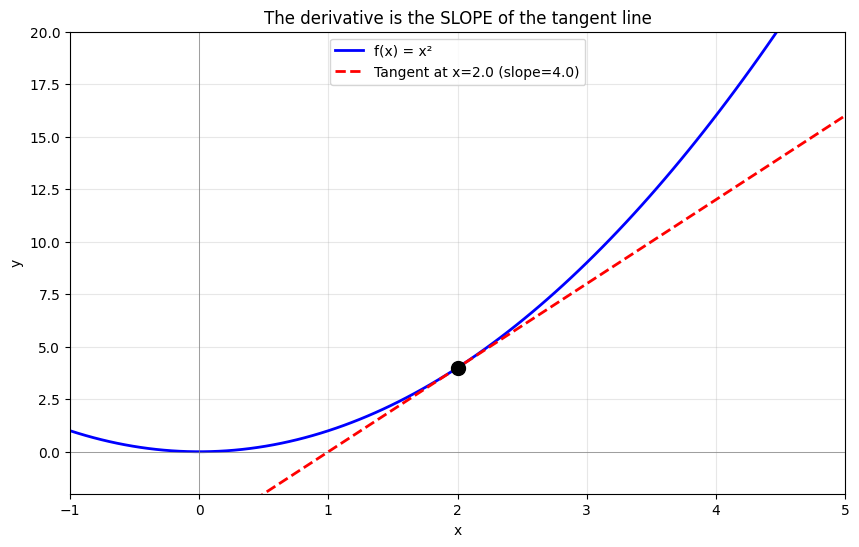

At x = 2.0:
  The curve passes through (2.0, 4.0)
  The slope of the tangent line is 4.0
  So the derivative at x=2.0 is 4.0


In [8]:
import numpy as np

# Draw the parabola
x_values = np.linspace(-1, 5, 100)
y_values = x_values ** 2

# Pick a point to show the tangent
x0 = 2.0
y0 = x0 ** 2
slope = 2 * x0  # derivative of x² is 2x

# Tangent line equation: y = slope * (x - x0) + y0
tangent_y = slope * (x_values - x0) + y0

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'b-', linewidth=2, label='f(x) = x²')
plt.plot(x_values, tangent_y, 'r--', linewidth=2, label=f'Tangent at x={x0} (slope={slope})')
plt.plot(x0, y0, 'ko', markersize=10)
plt.xlim(-1, 5)
plt.ylim(-2, 20)
plt.axhline(y=0, color='gray', linewidth=0.5)
plt.axvline(x=0, color='gray', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('The derivative is the SLOPE of the tangent line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"At x = {x0}:")
print(f"  The curve passes through ({x0}, {y0})")
print(f"  The slope of the tangent line is {slope}")
print(f"  So the derivative at x={x0} is {slope}")

### 📝 Quick Check #2

For `f(x) = x²`, what is the derivative at x = 10?

Think: the derivative of x² is 2x, so at x=10 it's...

In [10]:
# Your answer: derivative at x=10 is ____

def f(x):
    return x ** 2

x = 10
nudge = 0.0001
derivative = (f(x + nudge) - f(x)) / nudge

print(f"Derivative at x={x}: {derivative:.1f}")

Derivative at x=10: 20.0


---
## Section 4: The Power Rule (A Handy Shortcut)

Instead of computing nudges every time, there's a pattern:

| Function | Derivative | Pattern |
|----------|------------|--------|
| x¹ | 1 | bring down the 1, reduce power by 1 |
| x² | 2x | bring down the 2, reduce power by 1 |
| x³ | 3x² | bring down the 3, reduce power by 1 |
| x⁴ | 4x³ | bring down the 4, reduce power by 1 |

**The Power Rule:** derivative of xⁿ = n × x^(n-1)

"Bring down the exponent, then subtract 1 from it."

In [11]:
# Let's verify this pattern
nudge = 0.0001
x = 2.0

print("Verifying the power rule at x = 2:\n")

# x²
f = lambda x: x**2
numerical = (f(x + nudge) - f(x)) / nudge
formula = 2 * x  # 2x
print(f"x² → derivative = 2x = {formula:.0f}  (numerical: {numerical:.1f})")

# x³
f = lambda x: x**3
numerical = (f(x + nudge) - f(x)) / nudge
formula = 3 * x**2  # 3x²
print(f"x³ → derivative = 3x² = {formula:.0f}  (numerical: {numerical:.1f})")

# x⁴
f = lambda x: x**4
numerical = (f(x + nudge) - f(x)) / nudge
formula = 4 * x**3  # 4x³
print(f"x⁴ → derivative = 4x³ = {formula:.0f}  (numerical: {numerical:.1f})")

Verifying the power rule at x = 2:

x² → derivative = 2x = 4  (numerical: 4.0)
x³ → derivative = 3x² = 12  (numerical: 12.0)
x⁴ → derivative = 4x³ = 32  (numerical: 32.0)


### 📝 Quick Check #3

What's the derivative of x⁵?

Apply the power rule: bring down the 5, subtract 1 from the exponent...

In [12]:
# Your answer: derivative of x⁵ is ____

# Let's check at x = 2
x = 2.0
nudge = 0.0001

f = lambda x: x**5
numerical = (f(x + nudge) - f(x)) / nudge
formula = 5 * x**4  # 5x⁴

print(f"Your formula should give: 5 × {x}⁴ = 5 × {x**4} = {formula}")
print(f"Numerical check: {numerical:.1f}")

Your formula should give: 5 × 2.0⁴ = 5 × 16.0 = 80.0
Numerical check: 80.0


---
## Section 5: Two Inputs - Addition

Now let's see what happens when a function has **two inputs**.

### Example: z = x + y

If x = 3 and y = 4, then z = 7.

**Question 1:** If I nudge **x** from 3 to 3.001 (keeping y at 4), what happens to z?

- Before: z = 3 + 4 = 7
- After: z = 3.001 + 4 = 7.001

z nudged by exactly the same amount as x!

**Question 2:** If I nudge **y** from 4 to 4.001 (keeping x at 3), what happens to z?

- Before: z = 3 + 4 = 7
- After: z = 3 + 4.001 = 7.001

Same thing! z nudges by exactly the amount y nudges.

### The Addition Rule

For z = x + y:
- dz/dx = 1 (nudging x by 1 nudges z by 1)
- dz/dy = 1 (nudging y by 1 nudges z by 1)

**Intuition:** Addition is fair - both inputs contribute equally to the output.

In [13]:
x = 3.0
y = 4.0
z = x + y

nudge = 0.001

# Nudge x, keep y fixed
z_after_nudge_x = (x + nudge) + y
dz_dx = (z_after_nudge_x - z) / nudge

# Nudge y, keep x fixed
z_after_nudge_y = x + (y + nudge)
dz_dy = (z_after_nudge_y - z) / nudge

print(f"z = x + y = {x} + {y} = {z}")
print(f"")
print(f"If we nudge x by {nudge}: z goes from {z} to {z_after_nudge_x}")
print(f"  → dz/dx = {dz_dx}")
print(f"")
print(f"If we nudge y by {nudge}: z goes from {z} to {z_after_nudge_y}")
print(f"  → dz/dy = {dz_dy}")

z = x + y = 3.0 + 4.0 = 7.0

If we nudge x by 0.001: z goes from 7.0 to 7.0009999999999994
  → dz/dx = 0.9999999999994458

If we nudge y by 0.001: z goes from 7.0 to 7.001
  → dz/dy = 1.000000000000334


---
## Section 6: Two Inputs - Multiplication

This is more interesting!

### Example: z = x × y

If x = 3 and y = 4, then z = 12.

**Question 1:** If I nudge **x** from 3 to 3.001 (keeping y at 4), what happens to z?

- Before: z = 3 × 4 = 12
- After: z = 3.001 × 4 = 12.004

z changed by 0.004, which is **4 times** the nudge!

**Question 2:** If I nudge **y** from 4 to 4.001 (keeping x at 3), what happens to z?

- Before: z = 3 × 4 = 12
- After: z = 3 × 4.001 = 12.003

z changed by 0.003, which is **3 times** the nudge!

### The Multiplication Rule

For z = x × y:
- dz/dx = y (nudging x affects z by y times as much)
- dz/dy = x (nudging y affects z by x times as much)

**The derivative is the OTHER input!**

In [14]:
x = 3.0
y = 4.0
z = x * y

nudge = 0.001

# Nudge x, keep y fixed
z_after_nudge_x = (x + nudge) * y
dz_dx = (z_after_nudge_x - z) / nudge

# Nudge y, keep x fixed
z_after_nudge_y = x * (y + nudge)
dz_dy = (z_after_nudge_y - z) / nudge

print(f"z = x × y = {x} × {y} = {z}")
print(f"")
print(f"If we nudge x by {nudge}: z goes from {z} to {z_after_nudge_x}")
print(f"  → dz/dx = {dz_dx} (which equals y = {y})")
print(f"")
print(f"If we nudge y by {nudge}: z goes from {z} to {z_after_nudge_y}")
print(f"  → dz/dy = {dz_dy} (which equals x = {x})")

z = x × y = 3.0 × 4.0 = 12.0

If we nudge x by 0.001: z goes from 12.0 to 12.004
  → dz/dx = 3.9999999999995595 (which equals y = 4.0)

If we nudge y by 0.001: z goes from 12.0 to 12.003
  → dz/dy = 3.0000000000001137 (which equals x = 3.0)


### 🤔 Why Does This Make Sense?

Think of multiplication as the **area of a rectangle**.

```
      y = 4
   ┌─────────┐
   │         │
 x │   12    │   Area = 3 × 4 = 12
 = │         │
 3 │         │
   └─────────┘
```

If you make the rectangle **1 unit wider** (nudge x by 1):
- You add a strip that's 1 × y = 1 × 4 = **4 square units**

If you make the rectangle **1 unit taller** (nudge y by 1):
- You add a strip that's x × 1 = 3 × 1 = **3 square units**

So:
- dz/dx = y (width of the strip you add)
- dz/dy = x (height of the strip you add)

### 📝 Quick Check #4

For z = x × y, if x = 5 and y = 7:
- What is dz/dx?
- What is dz/dy?

In [15]:
# Your answers:
# dz/dx = ____
# dz/dy = ____

x = 5.0
y = 7.0
nudge = 0.0001

z = x * y
dz_dx = ((x + nudge) * y - z) / nudge
dz_dy = (x * (y + nudge) - z) / nudge

print(f"z = {x} × {y} = {z}")
print(f"dz/dx = {dz_dx:.0f} (should be y = {y})")
print(f"dz/dy = {dz_dy:.0f} (should be x = {x})")

z = 5.0 × 7.0 = 35.0
dz/dx = 7 (should be y = 7.0)
dz/dy = 5 (should be x = 5.0)


---
## Section 7: The Chain Rule - The Big One!

This is THE key idea for neural networks. Let's build up to it slowly.

### Analogy: The Telephone Game

Imagine a chain of people passing a message:

```
You → Alice → Bob → Charlie
```

- You whisper a number to Alice
- Alice **doubles** it and tells Bob
- Bob **triples** it and tells Charlie

If you whisper "5":
- Alice hears 5, says 10 (doubled)
- Bob hears 10, says 30 (tripled)
- Charlie hears 30

**Question:** If you whisper 5.001 instead of 5, how much does Charlie's number change?

- You change by 0.001
- Alice doubles it → Alice changes by 0.002
- Bob triples it → Bob changes by 0.006
- Charlie hears a change of **0.006**

The total effect is: **2 × 3 = 6 times** your original nudge!

**This is the chain rule:** multiply the effects along the chain.

In [ ]:
# Let's verify the telephone game
def alice(x):
    return 2 * x  # doubles

def bob(x):
    return 3 * x  # triples

def full_chain(x):
    return bob(alice(x))  # bob(alice(x))

x = 5.0
nudge = 0.001

# What Charlie hears
before = full_chain(x)
after = full_chain(x + nudge)

print(f"You say: {x}")
print(f"Alice says: {alice(x)}")
print(f"Bob says (Charlie hears): {bob(alice(x))}")
print(f"")
print(f"If you nudge to {x + nudge}:")
print(f"  Charlie now hears: {after}")
print(f"  Charlie's change: {after - before:.4f}")
print(f"  Your change: {nudge}")
print(f"  Ratio: {(after - before) / nudge:.1f}")
print(f"")
print(f"Chain rule predicts: 2 × 3 = 6 ✓")

### Now With a Real Function: f(x) = (x + 3)²

This is a **composition** of two functions:

1. **Inner function g(x) = x + 3** → "add 3"
2. **Outer function f(g) = g²** → "square it"

The chain looks like:
```
x → [add 3] → g → [square] → output
```

At x = 2:
- g = x + 3 = 5
- output = g² = 25

### Finding the Derivative

**Step 1:** What's the derivative of the inner function g(x) = x + 3?
- dg/dx = 1 (adding 3 doesn't amplify nudges)

**Step 2:** What's the derivative of the outer function f(g) = g² at g = 5?
- df/dg = 2g = 2 × 5 = 10

**Step 3:** Chain rule - multiply them!
- Total derivative = df/dg × dg/dx = 10 × 1 = **10**

In [16]:
def f(x):
    return (x + 3) ** 2

x = 2.0
nudge = 0.0001

# Numerical derivative
numerical = (f(x + nudge) - f(x)) / nudge

# Chain rule calculation
g = x + 3              # inner function value
dg_dx = 1              # derivative of inner (x + 3)
df_dg = 2 * g          # derivative of outer (g²) at this g
chain_rule = df_dg * dg_dx

print(f"f(x) = (x + 3)² at x = {x}")
print(f"")
print(f"Step by step:")
print(f"  g = x + 3 = {g}")
print(f"  dg/dx = 1")
print(f"  df/dg = 2g = 2 × {g} = {df_dg}")
print(f"")
print(f"Chain rule: {df_dg} × {dg_dx} = {chain_rule}")
print(f"Numerical check: {numerical:.1f} ✓")

f(x) = (x + 3)² at x = 2.0

Step by step:
  g = x + 3 = 5.0
  dg/dx = 1
  df/dg = 2g = 2 × 5.0 = 10.0

Chain rule: 10.0 × 1 = 10.0
Numerical check: 10.0 ✓


### Why This Matters for Neural Networks

A neural network is just a long chain:

```
input → [layer 1] → [layer 2] → [layer 3] → output → [loss]
```

To find "how does changing a weight in layer 1 affect the loss?", we:
1. Find how layer 1 affects layer 2 (local derivative)
2. Find how layer 2 affects layer 3 (local derivative)
3. Find how layer 3 affects loss (local derivative)
4. **Multiply them all together!**

This is **backpropagation** - computing derivatives by working backwards through the chain.

### 📝 Quick Check #5

For f(x) = (x + 1)², at x = 4:

1. What is g = x + 1?
2. What is dg/dx?
3. What is df/dg = 2g?
4. What is the total derivative (chain rule)?

In [17]:
# Your answers:
# g = ____
# dg/dx = ____
# df/dg = ____
# total = ____

x = 4.0
nudge = 0.0001

def f(x):
    return (x + 1) ** 2

# Calculate
g = x + 1
dg_dx = 1
df_dg = 2 * g
total = df_dg * dg_dx

print(f"g = x + 1 = {g}")
print(f"dg/dx = {dg_dx}")
print(f"df/dg = 2 × {g} = {df_dg}")
print(f"Total derivative = {total}")
print(f"")
print(f"Numerical check: {(f(x + nudge) - f(x)) / nudge:.1f}")

g = x + 1 = 5.0
dg/dx = 1
df/dg = 2 × 5.0 = 10.0
Total derivative = 10.0

Numerical check: 10.0


---
## Section 8: Putting It All Together - A Mini Computation Graph

Now let's trace derivatives through a small graph, exactly like micrograd does.

### The Function: L = (a × b) + c

Let's use a = 2, b = 3, c = 4.

**Forward pass** (compute the answer):
```
a = 2
b = 3        d = a × b = 6
c = 4                         L = d + c = 10
```

**Backward pass** (compute derivatives) - we work RIGHT to LEFT:

Start at the end: "How much does L change if L changes?" → 1 (duh!)

In [18]:
# Forward pass
a = 2.0
b = 3.0
c = 4.0

d = a * b      # d = 6
L = d + c      # L = 10

print("=" * 50)
print("FORWARD PASS (left to right)")
print("=" * 50)
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print(f"d = a × b = {a} × {b} = {d}")
print(f"L = d + c = {d} + {c} = {L}")

FORWARD PASS (left to right)
a = 2.0
b = 3.0
c = 4.0
d = a × b = 2.0 × 3.0 = 6.0
L = d + c = 6.0 + 4.0 = 10.0


### Backward Pass - Step by Step

Now we ask: **"How does each variable affect L?"**

We work backwards from L.

In [19]:
print("=" * 50)
print("BACKWARD PASS (right to left)")
print("=" * 50)

# Step 1: Start at L
print("\nStep 1: Start at L")
print("  How much does L change if L changes by 1? → 1")
dL_dL = 1.0
print(f"  dL/dL = {dL_dL}")

# Step 2: L = d + c (addition node)
print("\nStep 2: L = d + c (addition)")
print("  Addition rule: both inputs get the gradient equally")
dL_dd = dL_dL * 1  # derivative of d+c with respect to d is 1
dL_dc = dL_dL * 1  # derivative of d+c with respect to c is 1
print(f"  dL/dd = {dL_dd}")
print(f"  dL/dc = {dL_dc}")

# Step 3: d = a × b (multiplication node)
print("\nStep 3: d = a × b (multiplication)")
print("  Multiplication rule: gradient is the OTHER input")
dL_da = dL_dd * b  # derivative of a*b w.r.t. a is b
dL_db = dL_dd * a  # derivative of a*b w.r.t. b is a
print(f"  dL/da = dL/dd × b = {dL_dd} × {b} = {dL_da}")
print(f"  dL/db = dL/dd × a = {dL_dd} × {a} = {dL_db}")

BACKWARD PASS (right to left)

Step 1: Start at L
  How much does L change if L changes by 1? → 1
  dL/dL = 1.0

Step 2: L = d + c (addition)
  Addition rule: both inputs get the gradient equally
  dL/dd = 1.0
  dL/dc = 1.0

Step 3: d = a × b (multiplication)
  Multiplication rule: gradient is the OTHER input
  dL/da = dL/dd × b = 1.0 × 3.0 = 3.0
  dL/db = dL/dd × a = 1.0 × 2.0 = 2.0


In [20]:
print("=" * 50)
print("FINAL GRADIENTS")
print("=" * 50)
print(f"dL/da = {dL_da}  (nudge a by 1, L changes by {dL_da})")
print(f"dL/db = {dL_db}  (nudge b by 1, L changes by {dL_db})")
print(f"dL/dc = {dL_dc}  (nudge c by 1, L changes by {dL_dc})")

FINAL GRADIENTS
dL/da = 3.0  (nudge a by 1, L changes by 3.0)
dL/db = 2.0  (nudge b by 1, L changes by 2.0)
dL/dc = 1.0  (nudge c by 1, L changes by 1.0)


In [21]:
# Let's verify with numerical nudges!
print("=" * 50)
print("NUMERICAL VERIFICATION")
print("=" * 50)

def compute_L(a, b, c):
    return a * b + c

nudge = 0.0001
L_original = compute_L(a, b, c)

# Nudge a
L_nudged = compute_L(a + nudge, b, c)
print(f"dL/da: numerical = {(L_nudged - L_original) / nudge:.1f}, our answer = {dL_da} ✓")

# Nudge b
L_nudged = compute_L(a, b + nudge, c)
print(f"dL/db: numerical = {(L_nudged - L_original) / nudge:.1f}, our answer = {dL_db} ✓")

# Nudge c
L_nudged = compute_L(a, b, c + nudge)
print(f"dL/dc: numerical = {(L_nudged - L_original) / nudge:.1f}, our answer = {dL_dc} ✓")

NUMERICAL VERIFICATION
dL/da: numerical = 3.0, our answer = 3.0 ✓
dL/db: numerical = 2.0, our answer = 2.0 ✓
dL/dc: numerical = 1.0, our answer = 1.0 ✓


### The Computation Graph (ASCII Art)

Here's what we just computed, shown as a graph:

```
FORWARD (values)                 BACKWARD (gradients)
────────────────                 ───────────────────

    a=2 ──┐                         ┌── grad=3 (=b)
          ├── × ── d=6 ──┐          │
    b=3 ──┘              │          ├── × ── grad=1
                         ├── + ── L=10         │
    c=4 ─────────────────┘          │          ├── grad=1
                                    └── + ── grad=1
                                    │
                                    └── grad=1
                         
                                grad=2 (=a) ── b
```

Gradients flow **backwards** from L to the inputs!

### 📝 Quick Check #6 (The Big One!)

For L = (a + b) × c with a=1, b=2, c=3:

1. What is L?
2. Work backwards: what are dL/da, dL/db, dL/dc?

In [22]:
# Your work:
# L = (1 + 2) × 3 = ____
#
# Let d = a + b = 3, so L = d × c
#
# dL/dL = 1
# dL/dd = ____ (multiplication rule: it's the other input, c)
# dL/dc = ____ (multiplication rule: it's the other input, d)
# dL/da = ____ (chain through d: dL/dd × dd/da)
# dL/db = ____ (chain through d: dL/dd × dd/db)

# Check your answers:
a, b, c = 1.0, 2.0, 3.0
d = a + b
L = d * c

print(f"L = (a + b) × c = ({a} + {b}) × {c} = {L}")
print()

# Backward pass
dL_dL = 1
dL_dd = c   # multiplication: derivative w.r.t. d is c
dL_dc = d   # multiplication: derivative w.r.t. c is d
dL_da = dL_dd * 1  # chain rule: dL/dd × dd/da, and dd/da = 1 (addition)
dL_db = dL_dd * 1  # chain rule: dL/dd × dd/db, and dd/db = 1 (addition)

print(f"dL/da = {dL_da}")
print(f"dL/db = {dL_db}")
print(f"dL/dc = {dL_dc}")

# Verify
print("\nNumerical verification:")
nudge = 0.0001
print(f"  dL/da ≈ {((a+nudge+b)*c - L) / nudge:.1f}")
print(f"  dL/db ≈ {((a+b+nudge)*c - L) / nudge:.1f}")
print(f"  dL/dc ≈ {((a+b)*(c+nudge) - L) / nudge:.1f}")

L = (a + b) × c = (1.0 + 2.0) × 3.0 = 9.0

dL/da = 3.0
dL/db = 3.0
dL/dc = 3.0

Numerical verification:
  dL/da ≈ 3.0
  dL/db ≈ 3.0
  dL/dc ≈ 3.0


---
## Section 9: Connection to Micrograd

Remember the `Value` class from Python Fundamentals?

```python
class Value:
    def __init__(self, data, _children=()):
        self.data = data           # The number
        self.grad = 0              # ← THE GRADIENT!
        self._prev = set(_children) # Who made me
        self._backward = lambda: None
```

Now you know what `grad` means:
- It's dL/d(this value) - how much the final loss changes when this value changes
- The `_backward` function fills in the gradients using the rules we learned:
  - Addition: gradient flows through equally
  - Multiplication: gradient × the other input
  - Chain rule: multiply as you go backwards

**That's it!** Micrograd automates what we just did by hand.

---
## ✅ Checkpoint - What You Learned

You now understand:

1. **Derivative** = "nudge input, see how much output nudges"
2. **Power rule**: derivative of xⁿ = n × x^(n-1)
3. **Addition**: gradient flows through equally to both inputs
4. **Multiplication**: gradient = the OTHER input
5. **Chain rule**: multiply derivatives along the chain
6. **Backward pass**: work from output back to inputs

**You're ready for micrograd!** → `03_building_micrograd.ipynb`